# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,22647,9776,13792,2915,4482,5778


    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   66.36  83.86    65.00    7.50             68.18         62.95
1   44.09  84.77    71.82   54.55             70.45         74.09
24  85.91  84.55    83.86   69.32             78.41         97.50


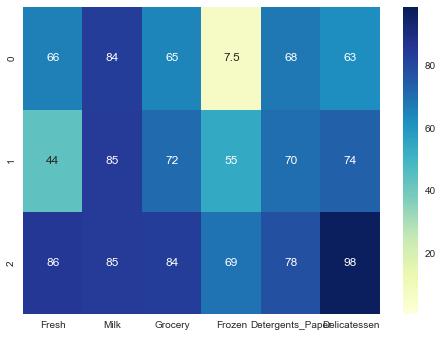

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0,1,24]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import seaborn as sns
# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=4)
print pcts
# visualize percentiles with heatmap
_ = sns.heatmap(pcts.reset_index(drop=True), annot=True, vmin=1, vmax=99, cmap='YlGnBu')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
For the first sample all the values are within a resonable range of the mean, except for frozen. So the establishment could be a convenience store.

For the second sample the fresh category is low, grocery is above the mean, and everything else is within a reasonable range of the mean. This could mean that the establishment is a larger convenience store or a medium size retailer not a supermarket.

For the third sample fresh is high along with grocery. The Delicatessen is in the 98th percentile I would think that this a supermarket. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
#imports
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

for feature in data.columns:

    new_data = data.drop([feature], axis=1)

    # Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], random_state=0, test_size=.25)

    # Create a decision tree regressor and fit it to the training set
    reg = DecisionTreeRegressor(random_state=0)
    reg.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = reg.score(X_test, y_test)
    print("{}: {}".format(feature, score))

Fresh: -0.252469807688
Milk: 0.365725292736
Grocery: 0.602801978878
Frozen: 0.253973446697
Detergents_Paper: 0.728655181254
Delicatessen: -11.6636871594


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I attempted to predict the 'Detergents_Paper' feature. The reported score was 0.728655181254 which means that the model can fit the data good. 

Is this feature is necessary for identifying customers' spending habits?

No this feature is not necessary. Since this feature has the highest R^2 score it means that the model fits this feature
 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


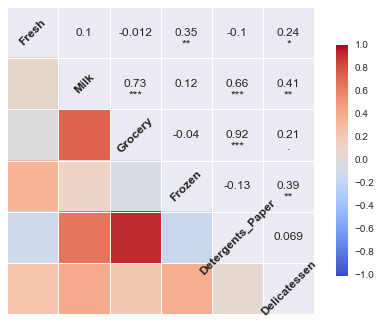

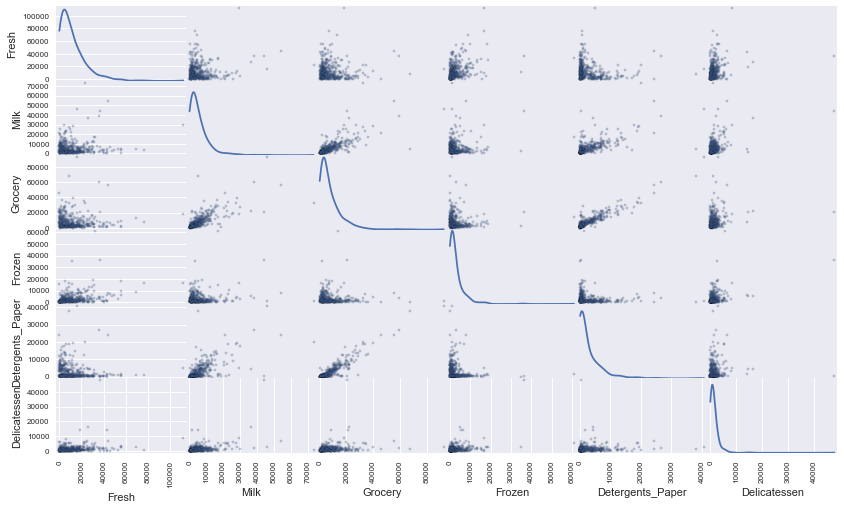

In [5]:
# Produce a scatter matrix for each pair of features in the data
import seaborn as sns
sns.corrplot(data)
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Grocery and detergents_paper exhibit some form of correlation. That is as the amount of detergents_paper is purchased there is a direct relationship to the amount of grocery purchased. As the amount purchased of detergents_paper increases the amount purchased of grocery increases. 

This is seen in the testing data that I obtained. When the detergents_paper feature is removed the score returned is negative. When any other feature is removed the score is positive.

It confirms my suspicions that all features are important to some degree. I was attempting to obtain the relevance of the detergents_paper feature and this confirms that detergents_paper feature has a strong correlation to Grocery feature.

The features are linearly correlated due to the direct relation between the increase in one and the increase in the other.

The distribution for Grocery is appears to be a lognormal distribution or an F distribution. The distribution for Detergents_paper also appears to be a lognoormal distribution or an F distribution.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

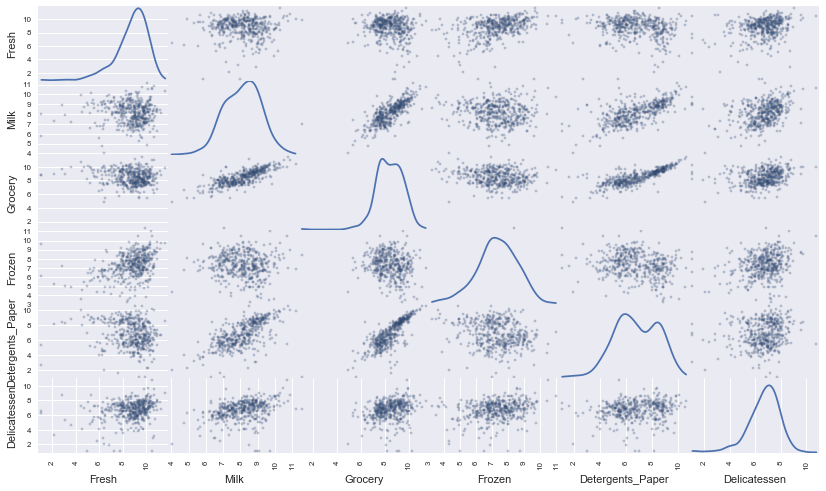

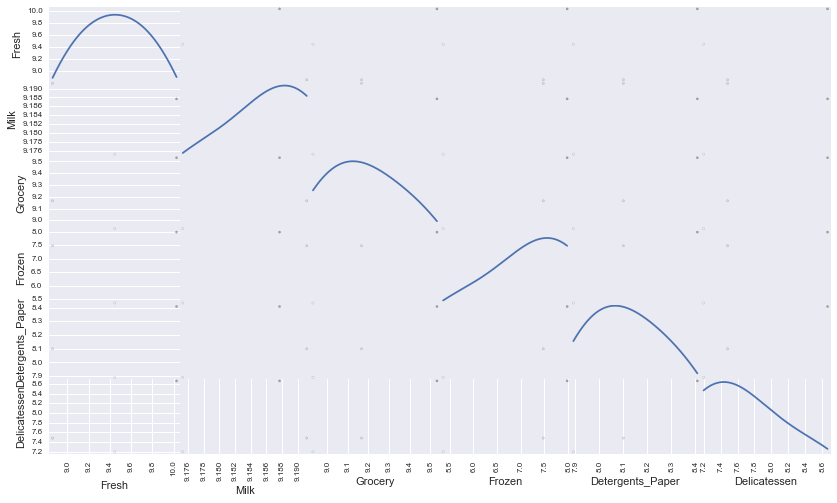

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
pd.scatter_matrix(log_samples, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples.head())
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,10.027783,9.187686,9.531844,7.977625,8.407825,8.661813


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# For each feature find the data points with extreme high or low values
arr = []

outliers_dict = {}
for value in log_data.index.values:
    outliers_dict[value] = 0
    
for j, feature in enumerate(log_data.keys()):
    
    Q1 = np.percentile(log_data[feature], 25)
    Q3 = np.percentile(log_data[feature], 75)
    step = 1.5*(Q3 - Q1)
    
    print "Data points considered outliers for the feature '{}':".format(feature)
    arr = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    arr = arr.index.values
    
    for value in arr:
        outliers_dict[value] += 1
        
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].head())

#last reviewer said that there were not 33 outliers that were in more than one feature I'm still getting 33

#Then print the ones which were observed more than once
outliers = []
for data_point in outliers_dict.keys():
    if outliers_dict[data_point] > 1:
        outliers.append(data_point)
outliers = np.array(outliers)
print outliers.shape
        
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612


(5,)


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
There are 5 datapoints which are outliers for more than one feature. 

These datapoints should be removed from the dataset if it will help to increase the regression score or obtain a better model.

The points that were added to the outlier list are the points that pass the requirement of being an outlier in more than feature. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

0.9268
0.6825


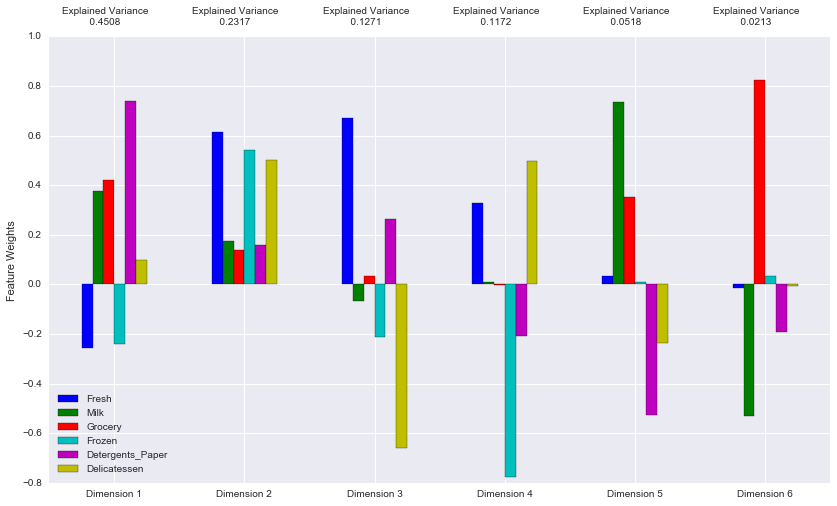

In [68]:
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=min(log_data.shape[0],log_data.shape[1])).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print(.4508 + .2317 + .1271 + .1172)
print(.4508 + .2317)


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
The amount of variance in the data that is explained in total by the first and second principal component is 0.6825. 

The first component can be interpreted as the correlation between Milk, grocery and detergents_paper. The first component has four positive weights and two negative weights. However, the value for three of the positive weights are the highest absolute values of the weights.

The second component can be interpreted as the correlation between Fresh, frozen, and delicatessen. All the weights in the second component are positive.

The amount of variance in the first four principal components is 0.9268. 
The third component can be interpreted as the correlation between Fresh and delicatessen. Fresh has the highest positive weight value. Delicatessen has the highest negative weight value. 

Lastly, the fourth can be interpreted as the correlation between Frozen, delicatessen, and fresh. Due to these three features having the highest absolute weights. Frozen has the negative weight value and is also the highest absolute value weight.

The first four dimensions represent the four components that are the linear combination of variables that explain the most variance in the data, in decreasing fashion.

-----------------
In terms of customers, since PCA deals with the variance of the data and the correlation between features, the first component would represent that we have some customers who purchase a lot of Milk, Grocery and Detergents_Paper products while other customers purchase very few amounts of Milk, Grocery and Detergents_Paper, hence spread in the data.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [69]:
# Display sample log-data after having a PCA transformation applied
print log_data.head()
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values).head())

       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079      8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682      8.553525


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7336,-0.0464,0.7733,1.7511,0.2590,-0.4398
1,1.6593,0.9468,-0.1912,0.0230,0.1770,-0.2143
2,1.7352,2.6293,-0.2009,0.5369,-0.0964,0.0262


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [70]:
from sklearn.decomposition import PCA
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
print reduced_data.head()


   Dimension 1  Dimension 2
0     1.733638    -0.046399
1     1.659284     0.946822
2     1.670666     1.758843
3    -1.333214     1.265589
4     0.472582     2.395789


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [71]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']).head())

,Dimension 1,Dimension 2
0,1.7336,-0.0464
1,1.6593,0.9468
2,1.7352,2.6293


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-Means 
- The algorithm scales well to a large number of samples
- can run pca on the data before using k-means to speed up the process
- simple algorithm choose initial centroids. Assign each point to a centroid. Take the mean of all the points assigned to centroids before and compute the new centroids. 
- k means will always converge. (However this may be to a local optimum)
- hard assignment of points
- faster computation time

Gaussian Mixture Model
- is meant to run on gaussian distributions. Using the normalized data log_data would be a perfect fit for this model.
- GMM slower due to using information about the distributions of the data
- unknown parameters generalizes k-means to include information about the covariance structure of the data and the centers of the latent gaussians
- soft assignment of points
- gives more structural information
- can measure how wide the cluster is

I will use the Gaussian Mixture model for learning. It generalize k-means to include information about the covariance structure which may prove to be beneficial.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [72]:
from sklearn import mixture
from sklearn import metrics
from sklearn import cluster
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GMM(n_components=3)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_
print clusterer.means_.shape

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = float('-inf')
max_score = float('-inf')

clusters = 0

for i in range (2,11):
    
    clusterer = mixture.GMM(n_components=i)
    clusterer.fit(reduced_data)
    preds1 = clusterer.predict(reduced_data)
    centers = clusterer.means_
    
    score = metrics.silhouette_score(reduced_data, preds1, metric='euclidean')
    print("The score obtained {} the number of clusters {} ".format(score,i))
    if float(score) > float(max_score):
        max_score = score
        clusters = i
    else:
        continue
    
print("The best score obtained {} the number of clusters {} ".format(max_score,clusters))

#Initialize two models
g2 = mixture.GMM(n_components=2)
g3 = mixture.GMM(n_components=3)

#Fit model to data
g2.fit(reduced_data)
g3.fit(reduced_data)

#BIC
print "2 clusters BIC: {bic}".format(bic=g2.bic(reduced_data))
print "3 clusters BIC: {bic}".format(bic=g3.bic(reduced_data))

#AIC
print "2 clusters AIC: {aic}".format(aic=g2.aic(reduced_data))
print "3 clusters AIC: {aic}".format(aic=g3.aic(reduced_data))

clusterer = mixture.GMM(n_components=int(clusters))
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

(3, 2)
The score obtained 0.442808188411 the number of clusters 2 
The score obtained 0.35256818026 the number of clusters 3 
The score obtained 0.351206362984 the number of clusters 4 
The score obtained 0.360338833629 the number of clusters 5 
The score obtained 0.345558182285 the number of clusters 6 
The score obtained 0.345650102726 the number of clusters 7 
The score obtained 0.321959491677 the number of clusters 8 
The score obtained 0.2329918476 the number of clusters 9 
The score obtained 0.200362458875 the number of clusters 10 
The best score obtained 0.442808188411 the number of clusters 2 
2 clusters BIC: 3146.50758964
3 clusters BIC: 3164.52131715
2 clusters AIC: 3110.42827097
3 clusters AIC: 3108.39793255


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

The score obtained 0.442808188411 the number of clusters 2 
The score obtained 0.349520490786 the number of clusters 3 
The score obtained 0.349252954625 the number of clusters 4 
The score obtained 0.360338833629 the number of clusters 5 
The score obtained 0.345558182285 the number of clusters 6 
The score obtained 0.346761952921 the number of clusters 7 
The score obtained 0.319014250812 the number of clusters 8 
The score obtained 0.295386075774 the number of clusters 9 
The score obtained 0.184886462587 the number of clusters 10 

The best score obtained 0.442808188411 the number of clusters 2 



2 clusters BIC: 3146.50758964
3 clusters BIC: 3164.52338742
2 clusters AIC: 3110.42827097
3 clusters AIC: 3108.40000282

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

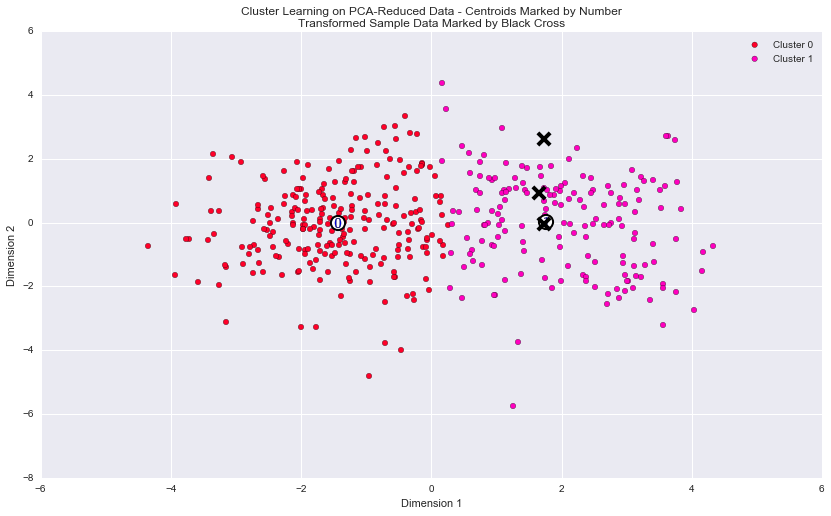

In [73]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   9599  2010     2560    2172               318           735
Segment 1   4347  6729     9947    1023              3437          1025

Fresh               8533
Milk                3677
Grocery             4748
Frozen              1619
Detergents_Paper     820
Delicatessen        1000
dtype: float64
           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   1066 -1667    -2188     553              -502          -265
Segment 1  -4186  3052     5199    -596              2617            25


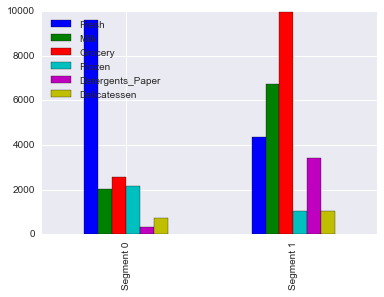

In [80]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print true_centers
print
print np.exp(good_data).median()
true_centers.plot(kind = 'bar')
print true_centers - np.exp(good_data).median()

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Segment 0 could represent a supermarket which sells alot of fresh feature. This can been seen in that when taking the data that has the outliers removed the median value for the fresh feature is 8533 which makes segment 0 above the median. Segment 0 is also above the median in the frozen feature.

Segment 1 could represent a fairly large supermarket since it sells alot of grocery and milk. When taking the median values from the good data and subtracting these values from the segments segment 1 can be described as a segment that contains above median in several features. The features are Milk, grocery, detergents_paper and delicatessen.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [62]:
print true_centers
print samples

b = np.array(true_centers)
for n in b:
    print np.sum(n)
b = np.array(samples)
for n in b:
    print np.sum(n)
    
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   9599  2010     2560    2172               318           735
Segment 1   4347  6729     9947    1023              3437          1025
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2  22647  9776    13792    2915              4482          5778
17394.0
26508.0
34112
33266
59390
Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**
I took true centers and summed them up using numpy. Then I took the samples and summed them up also. Obtaining the numbers I then determined based upon the total purchasing amount which segment the customer should be in. Since all of the sample points have sums that are more than 26508.0 they should all have a prediction of cluster 1 which they do.

Sample point 0 is consistent.

Sample point 1 is consistent.

Sample point 2 is consistent.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**
The structure of the data provides segments that group together customers that are alike. Then for each segment of N segments split the customers into two subsets of 50 50 split.

Then perform an A/B test on the subsets. The first subset would see the 5 days a week delivery service the "A" and the second subset would see the 3 days a week delivery service the "B".

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
In order to predict a new feature for each customer we could use the customer segments. We use the segment labels as new input features to a new analysis

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

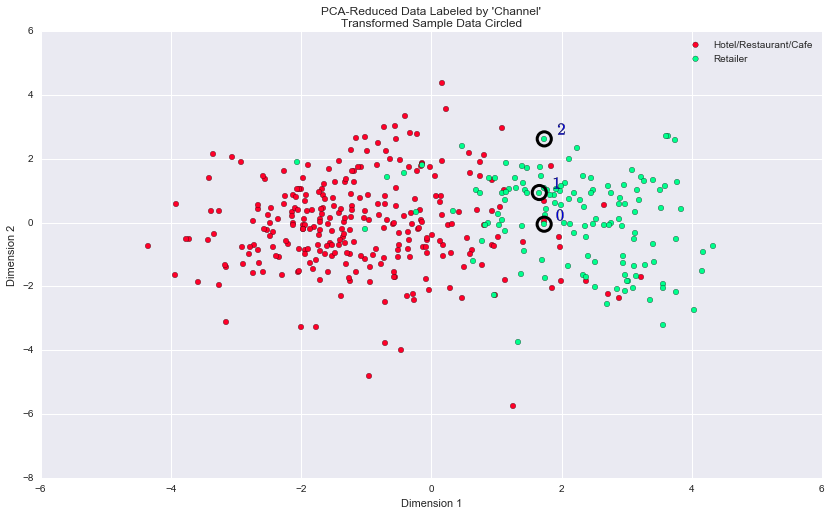

In [63]:

# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?

It compares fairly well. Cluster 0 are mainly Hotel/restaurant/cafe and cluster 1 is mainly retailer.

Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 

No not purely since there is some mix between the retailers and hotels/restaurants/cafes in the clusters. However, mostly yes.

Would you consider these classifications as consistent with your previous definition of the customer segments?

Yes the classifications define a group of customers which are grouped together based upon common traits. This is the same as segments which group customers together which have the same common traits.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.